In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/경영과학2/dataset/'

data = pd.read_csv(data_path + 'segmentation data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# 1. 데이터 파악 및 전처리

## 1.1. data type, 기초 통계량 확인

In [ ]:
# .info() 메소드로 데이터 결측치 확인 -> 결측치 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
# 수치형 변수와 범주형 변수 분리
num_columns = ['ID','Age','Income']
cat_columns = ['Sex','Marital status','Education','Occupation','Settlement size']

data[cat_columns] = data[cat_columns].astype('str')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
# object 데이터의 describe
data.describe(include="object").T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [ ]:
# 중복 행 확인 -> 0개 = 없음
data.duplicated(['ID']).sum()

0

In [ ]:
# 범주형 변수의 각 값과 frequency 확인
for cat_column in cat_columns:
  print(data[cat_column].value_counts(),'\n')

0    1086
1     914
Name: Sex, dtype: int64 

0    1007
1     993
Name: Marital status, dtype: int64 

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64 

1    1113
0     633
2     254
Name: Occupation, dtype: int64 

0    989
1    544
2    467
Name: Settlement size, dtype: int64 



## 1.2. 이상치 제거

이상치 확인 후 제거 -> 87개 제거

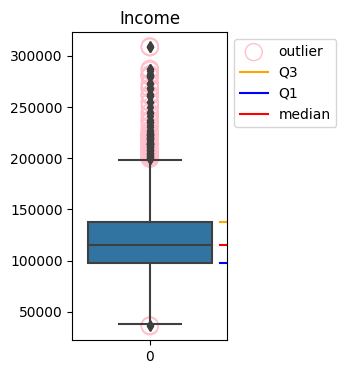

In [ ]:
# 이상치 찾기
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)

## Q3에서 Q1을 뺀 만큼이 IQR (중앙 50% 범위의 크기)
IQR = Q3 - Q1

## Q1 - 1.5*IQR보다 작거나, Q3 + 1.5*IQR보다 크면 이상치
outlier_mask = (data['Income'] < Q1-1.5*IQR) | (data['Income'] > Q3+1.5*IQR)
outlier = data[outlier_mask]

# 이상치 시각화
import numpy as np
fig = plt.figure(figsize=(2, 4))

sns.boxplot(data['Income'])
plt.scatter(np.zeros_like(outlier['Income']), outlier['Income'], s=150,  edgecolor='pink', facecolors='none', label='outlier')  # outlier
plt.axhline(Q3, xmin=0.95, color='orange', label='Q3')   # Q3
plt.axhline(Q1, xmin=0.95, color='blue', label='Q1')   # Q1
plt.axhline(data['Income'].median(), xmin=0.95, color='red', label='median')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Income')

plt.show()

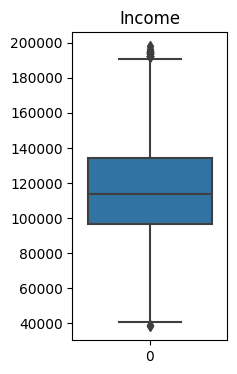

In [ ]:
data = data[~outlier_mask]  # 이상치를 제거한 데이터프레임

#cleaned_df = wine_df.drop(outlier.index, axis=0)

fig = plt.figure(figsize=(2, 4))

sns.boxplot(data['Income'])
plt.title('Income')

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               1917 non-null   int64 
 1   Sex              1917 non-null   object
 2   Marital status   1917 non-null   object
 3   Age              1917 non-null   int64 
 4   Education        1917 non-null   object
 5   Income           1917 non-null   int64 
 6   Occupation       1917 non-null   object
 7   Settlement size  1917 non-null   object
dtypes: int64(3), object(5)
memory usage: 199.3+ KB


# 2. EDA

## 2.1. 수치형 변수의 분포 분석

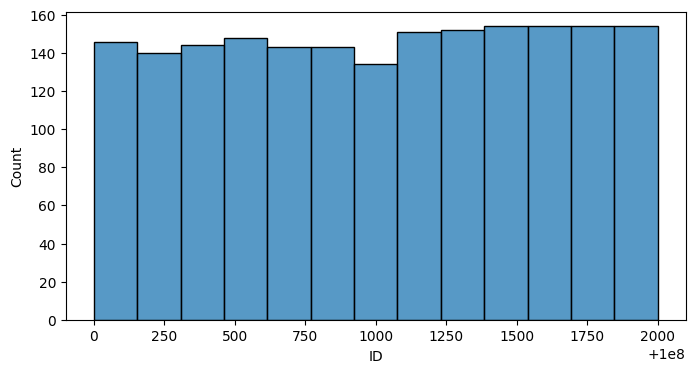

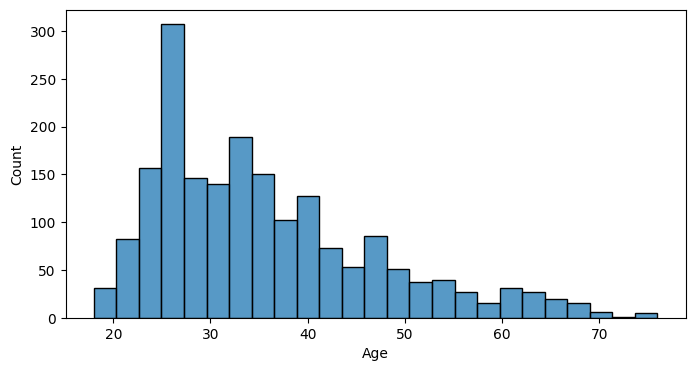

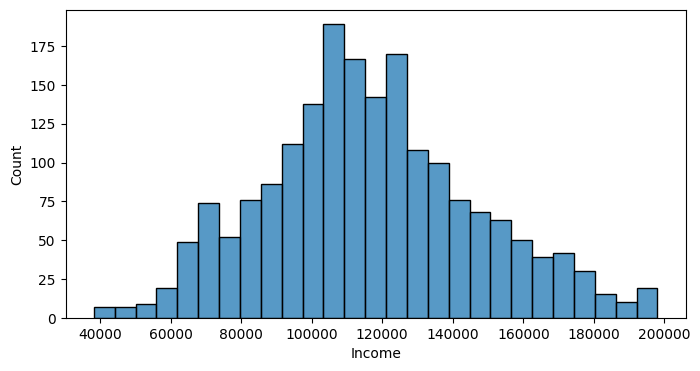

In [ ]:
for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data, x=numerical)
    plt.savefig(numerical + '.png')

## 수치형 변수의 분포 결과
- Age는 오른쪽 꼬리가 긴(왜도>0) 분포
- Income은 정규분포에 가까워 보임

### 추가: Income과 Age의 정규성 검정

In [ ]:
from scipy import stats

In [ ]:
normaltest_result_income = stats.normaltest(data['Income'])[1]
normaltest_result_age    = stats.normaltest(data['Age'])[1]

print(f'Income의 정규분포 가정의 귀무가설 p-value: {normaltest_result_income}')
print(f'Age의 정규분포 가정의 귀무가설 p-value: {normaltest_result_age}')

Income의 정규분포 가정의 귀무가설 p-value: 3.971177369686299e-05
Age의 정규분포 가정의 귀무가설 p-value: 1.711422104384591e-54


### 정규성 검정의 결과
Income과 Age는 모두 정규분포를 따르지 않음을 통계적으로 유의하게 확인

## 2.2. 범주형 변수의 분포(frequency) 분석

0    0.53469
1    0.46531
Name: Sex, dtype: float64 

1    0.501304
0    0.498696
Name: Marital status, dtype: float64 

1    0.706834
0    0.141888
2    0.134585
3    0.016693
Name: Education, dtype: float64 

1    0.572248
0    0.329160
2    0.098592
Name: Occupation, dtype: float64 

0    0.512780
1    0.268127
2    0.219092
Name: Settlement size, dtype: float64 



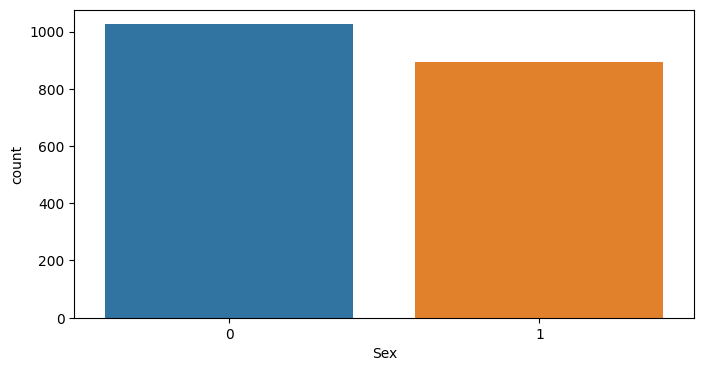

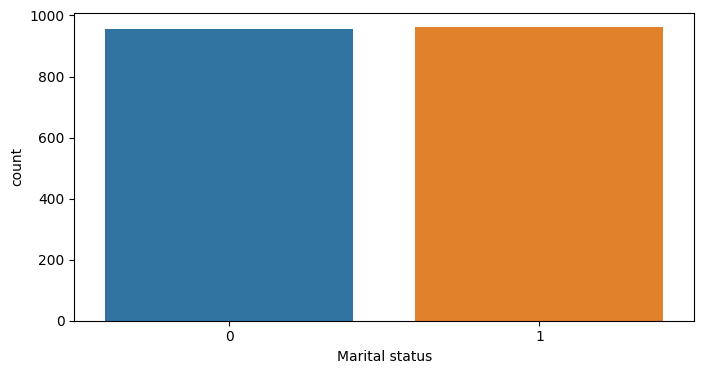

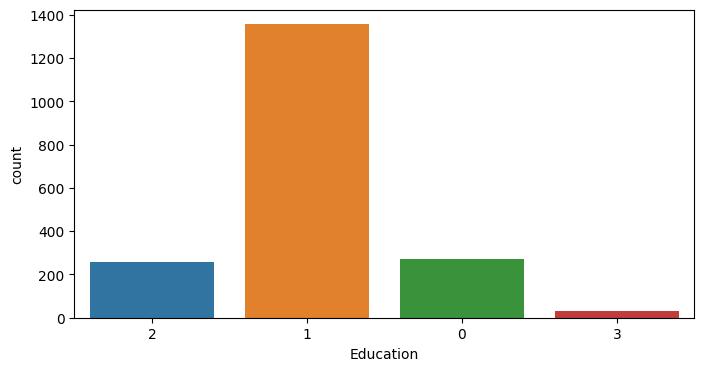

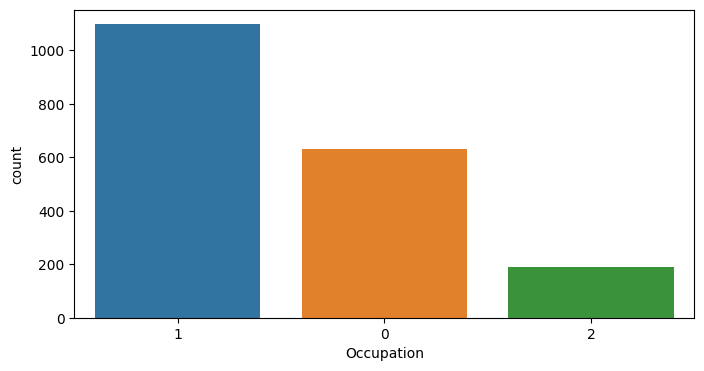

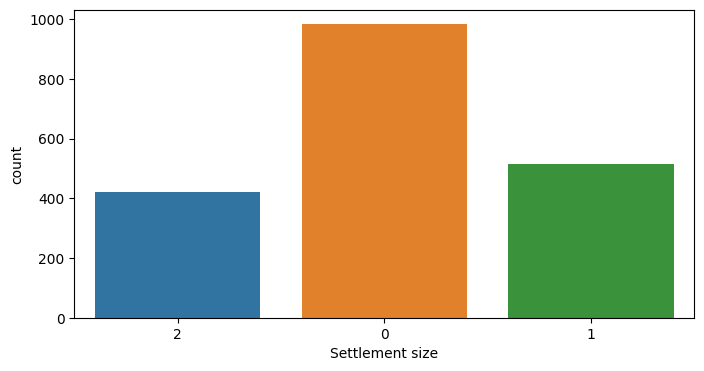

In [ ]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=category)
    print(data[category].value_counts(normalize=True), '\n')
    plt.savefig(category + '.png')

## 범주형 분포의 결과

- Sex와 Martial Status는 보다 균일한 분포

- Education에서는 1(고등학교 졸업)이 가장 많은 약 70.7% 차지, 3(대학원생)은 2%로 가장 적음

- Occupation와 Settlement size는 데이터가 한 쪽으로 크게 쏠리거나 그러지 않아보임

## 2.3. 수치형 변수 간 이변량 분석(x와 y간의 관계 분석)

<ipython-input-17-8406b54f27a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr(method='pearson')


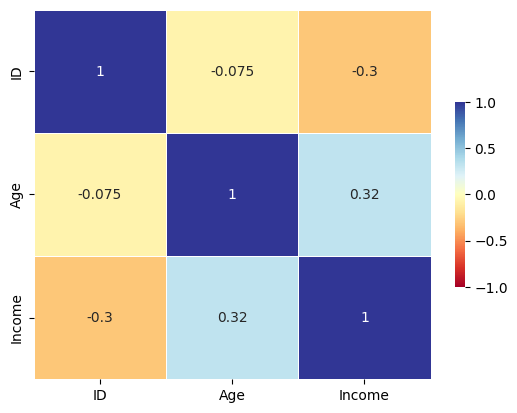

<Figure size 640x480 with 0 Axes>

In [ ]:
# 상관관계 - 히트맵
data_corr = data.corr(method='pearson')
sns.heatmap(data_corr,
            cmap = 'RdYlBu',
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()
plt.savefig('data_corr' + '.png')

<Axes: xlabel='Age', ylabel='Income'>

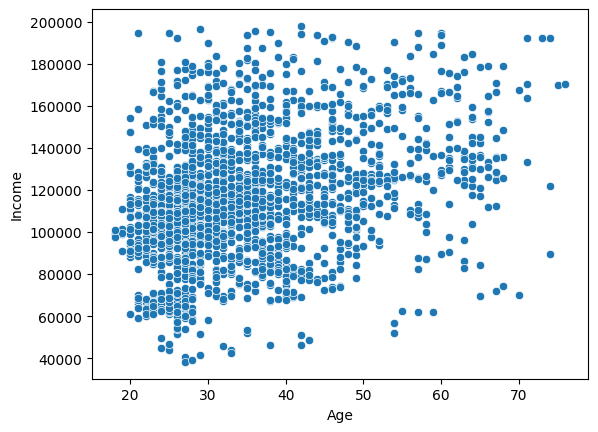

In [ ]:
# Age와 Income의 scatter차트
sns.scatterplot(x='Age', y='Income', data=data)


### Age와 Income 관계
Age와 Income에서 상관계수가 0.32로 약한 양의 상관관계가 있어 보인다.

이는 regplot으로도 확인할 수 있다.

<Axes: xlabel='Age', ylabel='Income'>

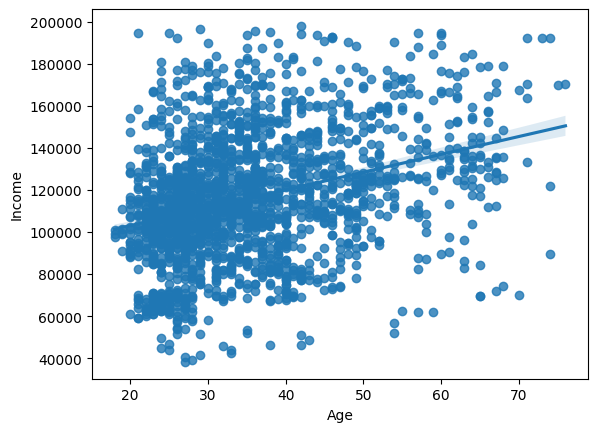

In [ ]:
# scatterplot에 추세선 작성
sns.regplot(x='Age', y='Income', data=data)

## 2.4. 수치형 변수와 범주형 변수 조합의 kdeplot 분석

In [ ]:
# 각 Occupation별 Income의 평균
Occupation=['0','1','2']
for value in Occupation:
  print(value, {data.Income[data['Occupation']==value].mean()}, '\n')

0 {91010.10459587956} 

1 {124032.63081130355} 

2 {155264.79365079364} 



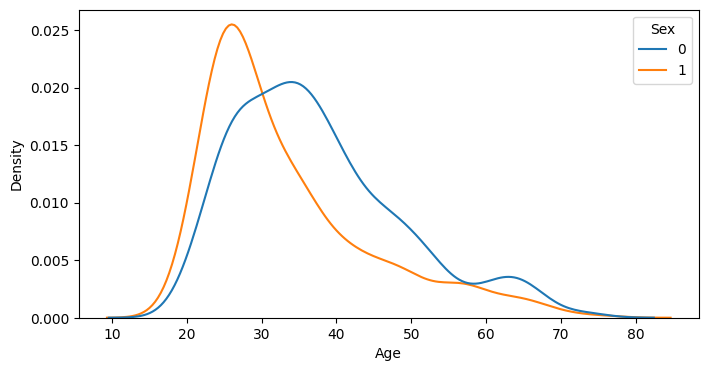

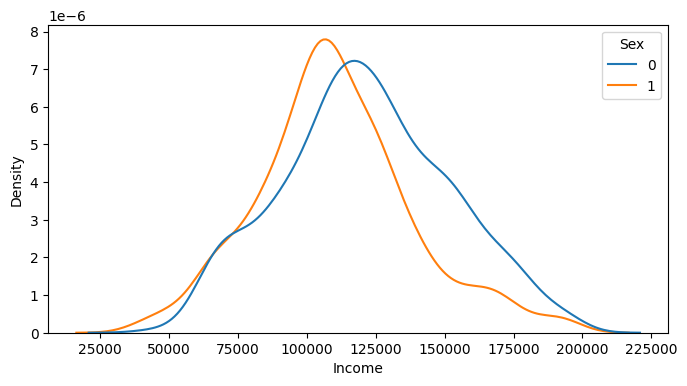

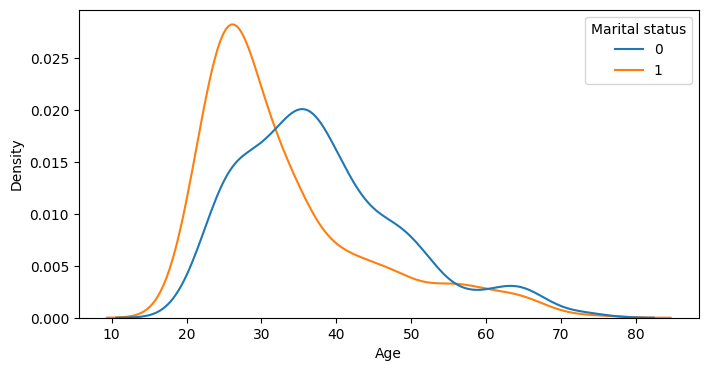

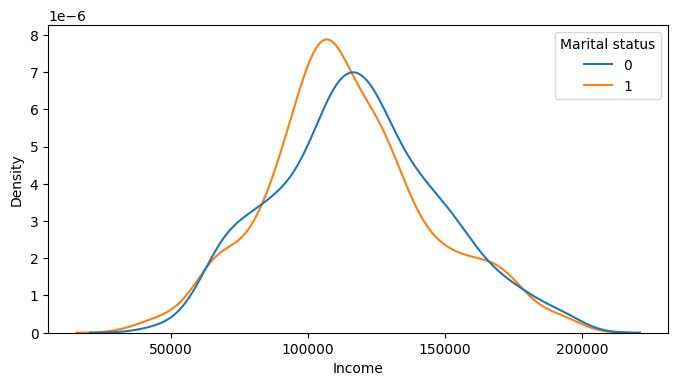

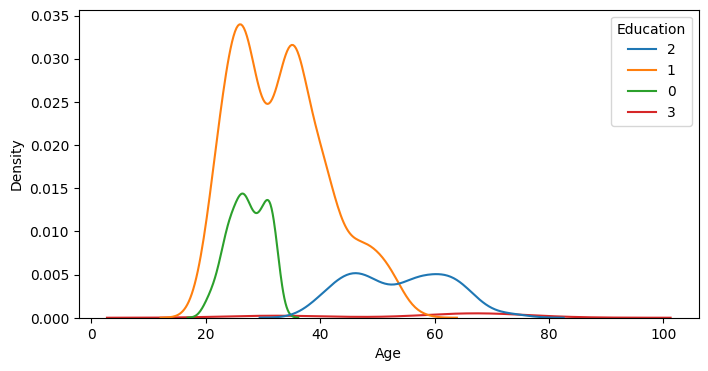

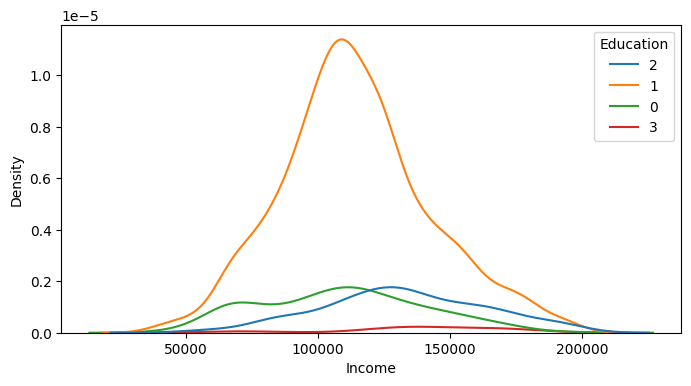

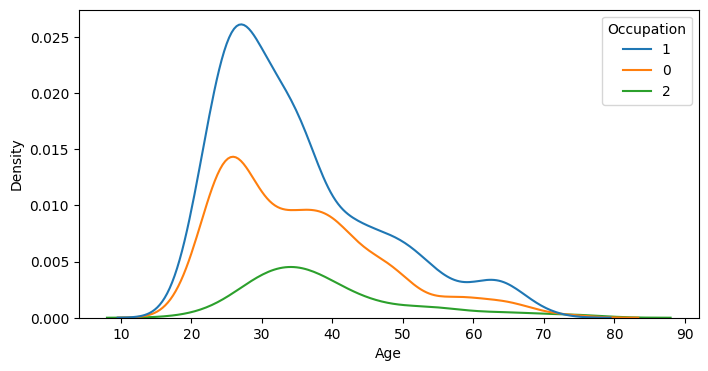

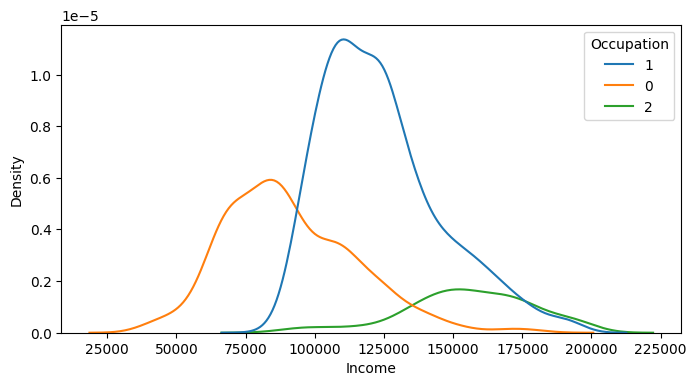

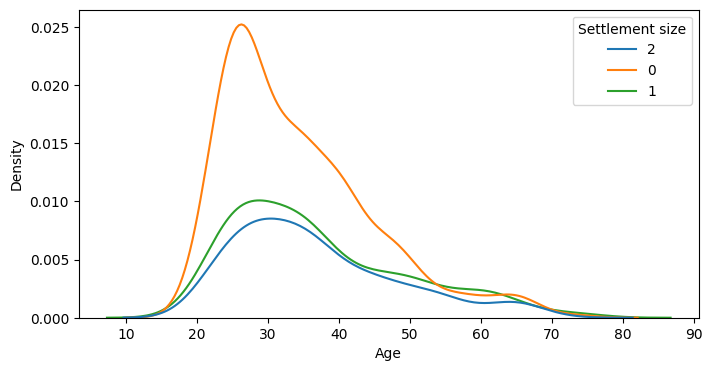

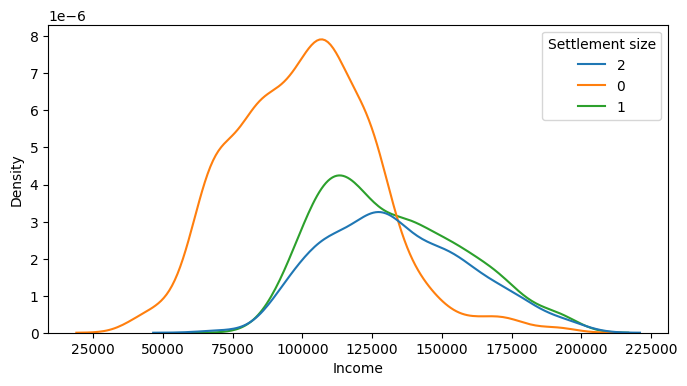

In [ ]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=data, x=numerical, hue=category)

## 수치형, 범주형 변수 관계 결과

- Age와 Martial Status사이에서 1(non-single)의 Age가 0(single)의 평균 Age보다 어림을 알 수 있음

- Age과 Education 사이에서  1(high school)의 비율이 20~40대에 집중 분포해있고, 2(university)는 40대 이상에서 분포해있음

- Occupation은 전체적으로 20-30대에 집중 분포해있고 나이가 많아질수록 적어짐

- Occupation 수준이 올라갈 수록 평균 수입은 높아짐

- Income과 Settlement size 사이에서 0(small city)에서 저소득 비율을 다수 차지하는 걸로 보임

## 2.5. 범주형 변수 간의 관계 분석

In [ ]:
cat_columns

['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

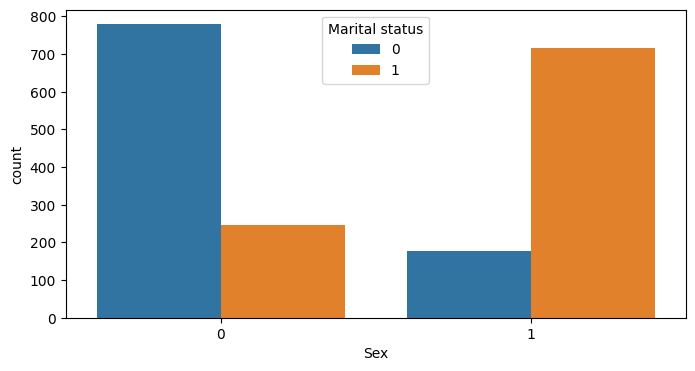

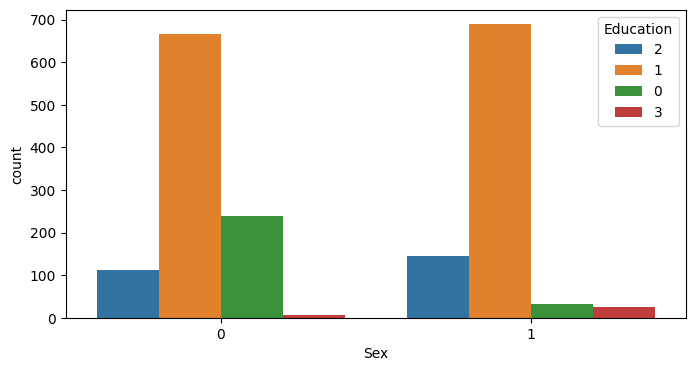

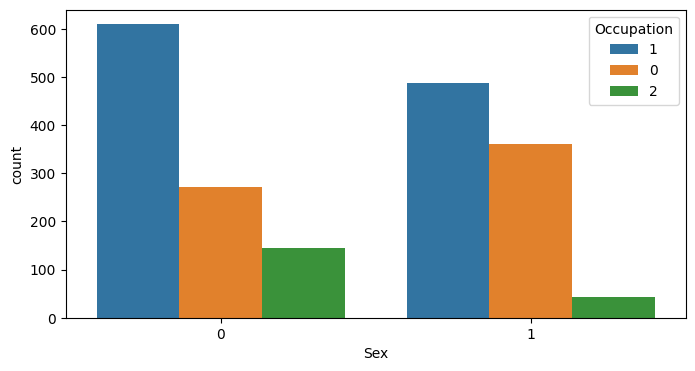

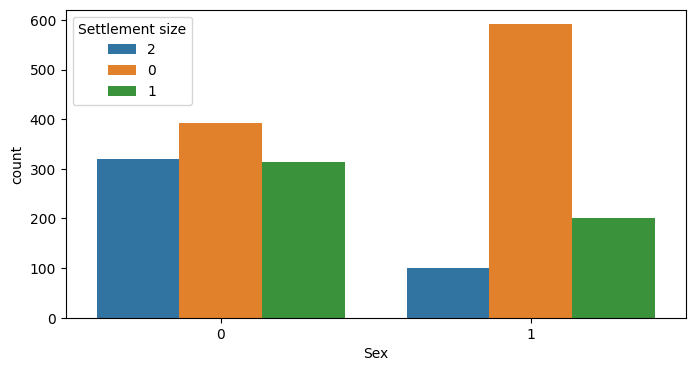

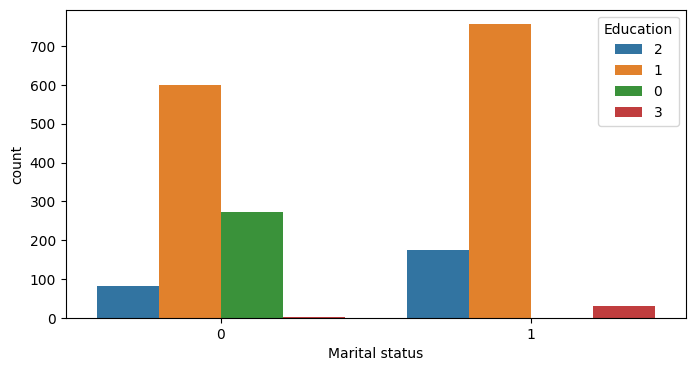

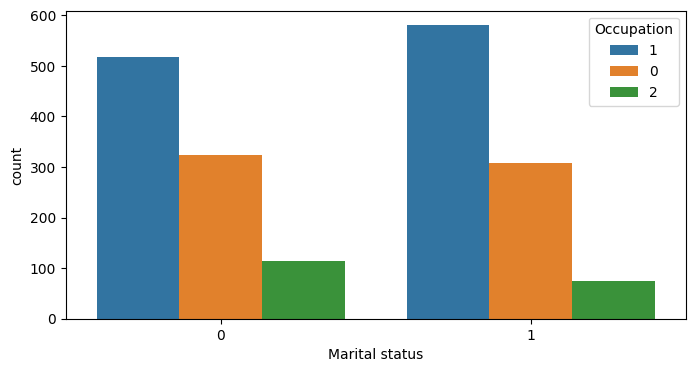

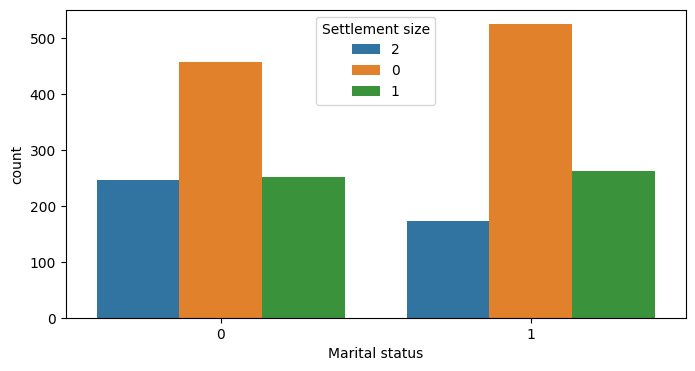

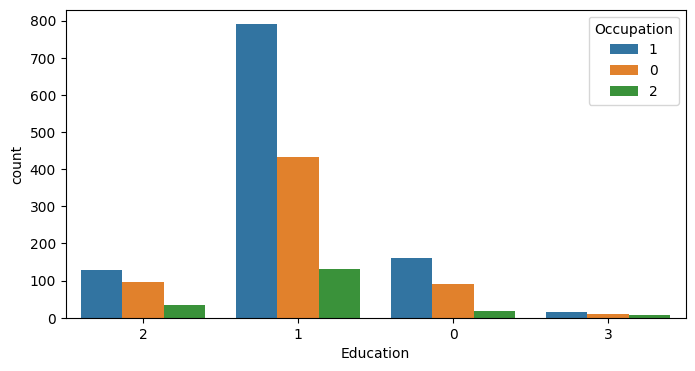

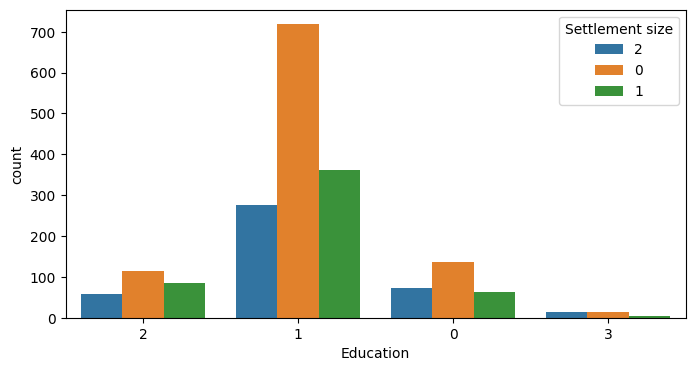

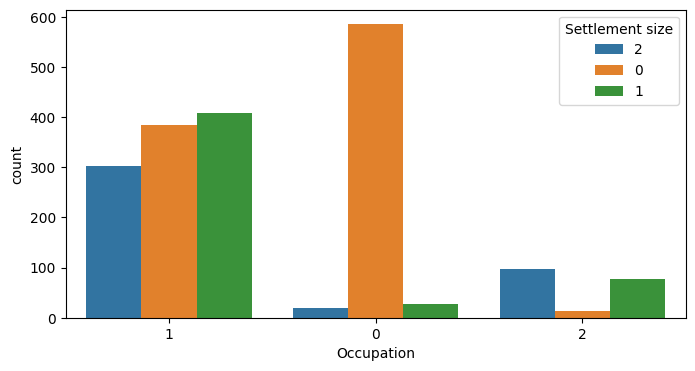

In [ ]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=data, x=category1, hue=category2)

## 범주형 변수 간의 관계 결과

- 남자가 여자보다 싱글이 더 많음 -> 여자가 더 결혼을 많이 함

- 여자가 더 작은 도시에 사는 경향이 있음

- 싱글이 아닌 사람들이 고등학교 이상의 수준의 교육을 받는 경향이 있음, 0(고졸 미만)은 없음

- 싱글이 아닌 사람들이 싱글인 사람보다 더 작은 도시에 사는 경향이 있음

- Occupataion=0(무직)인 사람들은 거의 소도시에 산다고 볼 수 있음



## 2.6. 다변량 분석

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=0.85)

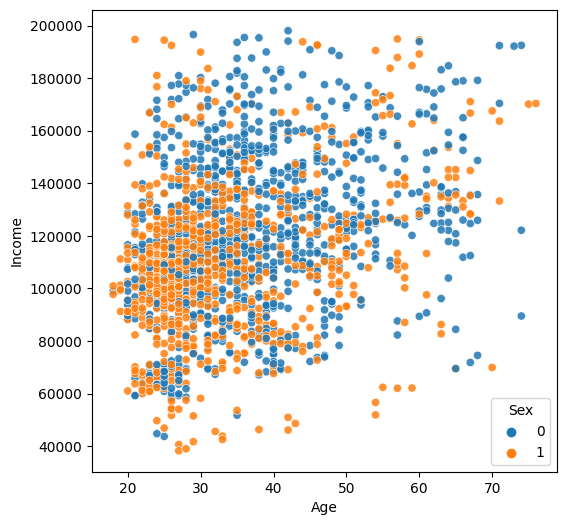

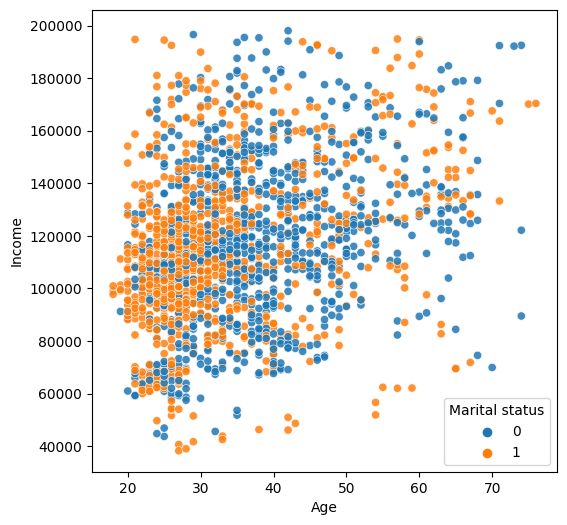

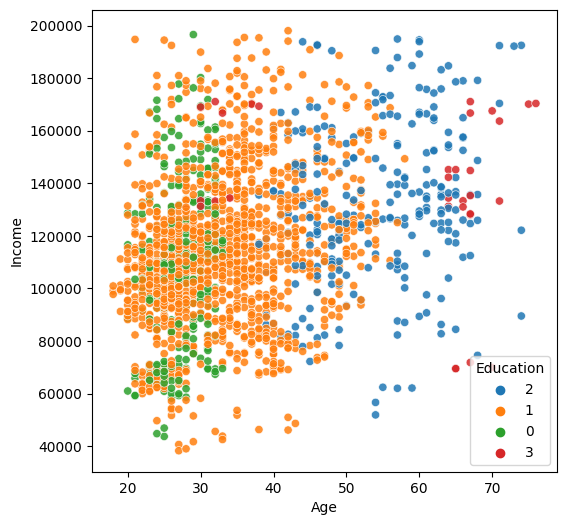

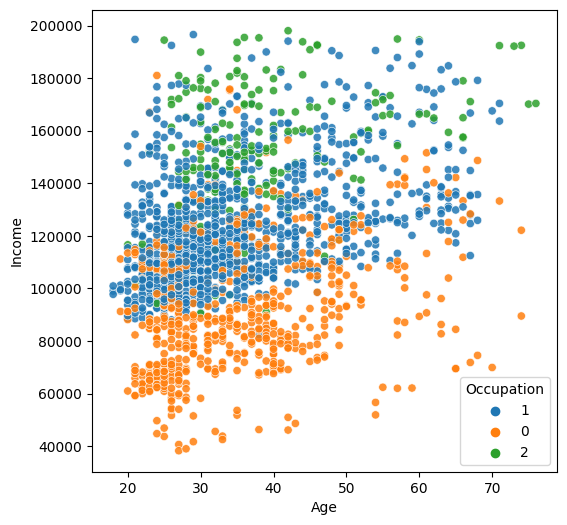

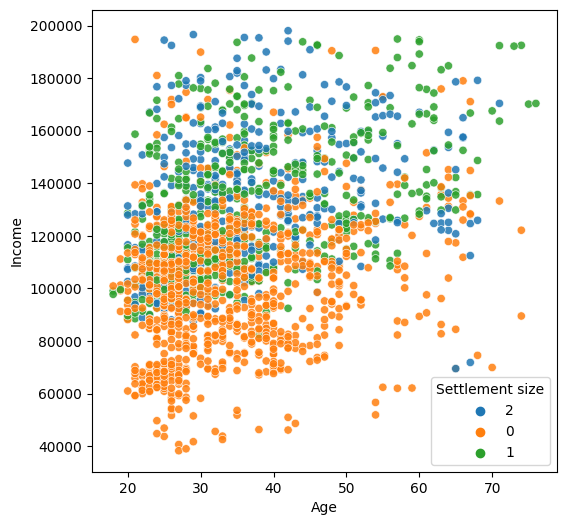

In [ ]:
# x축 Age, y축 Income으로 했을 때 각 범주형 변수들의 값 분포
for cat in cat_columns:
    bivariate_scatter('Age', 'Income', cat, data)


In [ ]:
# 각 Marital Status의 Age, Income의 평균
Marital=['0', '1']
for value in Marital:
  print(value, data.Age[data['Marital status']==value].mean())
  print(value, data.Income[data['Marital status']==value].mean(), '\n')

0 38.06380753138075
0 118033.41945606694 

1 33.062434963579605
1 114460.2174817898 



In [ ]:
# 각 Sex의 Age, Income의 평균
sex=['0', '1']
for value in sex:
  print(value, data.Age[data['Sex']==value].mean())
  print(value, data.Income[data['Sex']==value].mean(), '\n')

0 37.493658536585365
0 121478.39609756098 

1 33.33071748878924
1 110225.18161434977 



# 다변량 분석 결과

- 작은 도시에 살 수록 소득이 낮은 경향을 보임

- 직업의 수준이 높을 수록 소득이 높음

- 고학력자(Education=2,3)는 나이가 많지만 소득에 영향을 끼치지는 않아 보임

- 싱글이 아닐 수록 나이가 젊고 소득이 적은 경향이 있음

- 남자가 여자보다 평균적으로 나이가 많을 수록 소득이 높은 경향이 있음

# 3. Min-Max 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.84482759, 0.66666667,
       0.5408807 , 0.5       , 1.        ])

In [ ]:
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3,4,5,6,7
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,0.507954,0.465310,0.501304,0.302700,0.342027,0.488135,0.384716,0.353156
std,0.290162,0.498925,0.500129,0.197444,0.195148,0.187924,0.306099,0.401857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257629,0.000000,0.000000,0.155172,0.333333,0.366262,0.000000,0.000000
50%,0.511756,0.000000,1.000000,0.258621,0.333333,0.474146,0.500000,0.000000
75%,0.760380,1.000000,1.000000,0.413793,0.333333,0.602195,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Clustering Model 설계
## **K-Means Clustering**

## 4.1. Elbow method

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

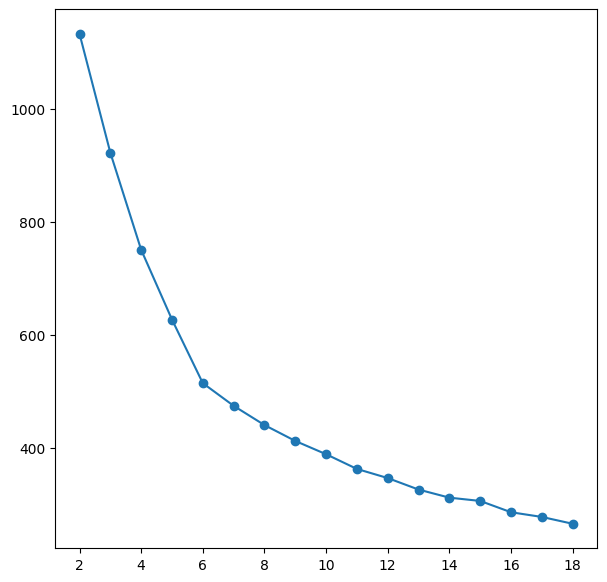

In [ ]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

 - Elbow method를 통한 최적 초기 군집 수는 6개로 확인 -> silhouette score도 확인

## 4.2. Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 실루엣 기법
def silhouette(data, k):
  sil_score = []
  for i in range(2, k):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    sil_score.append(silhouette_avg)

  plt.plot(range(2, k), sil_score, 'bo-')
  plt.title("silhouette")
  plt.xlabel("number of clusters")
  plt.ylabel("silhouette_coef")
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

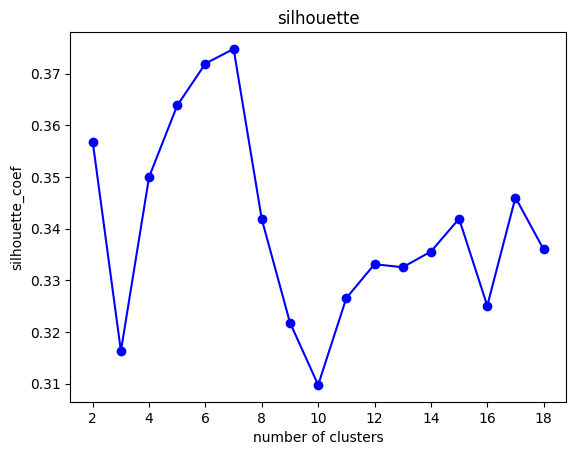

In [ ]:
silhouette(X, 19)

- silhouette 기법을 통한 최적 초기 군집 수는 7개로 확인
- 초기 군집 수= 6 or 7

# **초기 군집 수는 6으로 설정**

# 5. PCA를 이용한 시각화

## 5.1. 시각화를 위한 PCA 주성분 개수 선정

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
print(pca.explained_variance_ratio_)

[0.44636151 0.23639792 0.10678002]


- PCA의 component를 3개로 하면 설명력이 **약 79%** 정도 되므로 **주성분 3개**로 차원 축소하여 시각화를 진행

## 5.2. 군집 수 6개일 때: 군집 수 6개로 군집화 진행한 후 3차원 시각화
**시각화는 jupyter notebook으로 확인**

In [ ]:
kmeans_6=KMeans(n_clusters=6, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = kmeans_6.labels_
X_pca_df['Labels'] = labels

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
X_pca_df.head()

,X1,X2,X3,Labels
0,0.920650,0.432274,-0.108476,2
1,-0.395672,0.901620,-0.169249,3
2,0.562633,-0.546496,0.354348,0
3,0.812301,0.125450,0.021138,2
4,0.809887,0.095004,0.030333,2


In [ ]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [ ]:
from mpl_toolkits import mplot3d
import plotly.express as px
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()


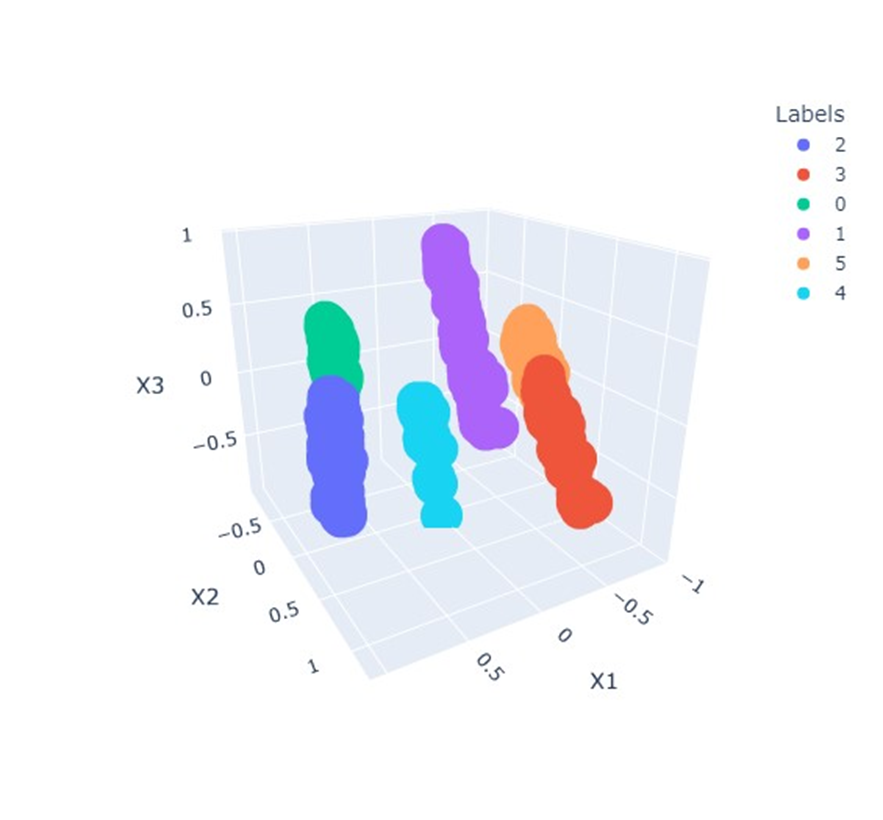

시각적으로 봤을 때 군집이 잘 이루어진 것으로 보임

## 5.3. 군집 수 7개 일 때: 군집 수 7개로 군집화 진행한 후 3차원 시각화
**시각화는 jupyter notebook으로 확인**

In [ ]:
kmeans_7=KMeans(n_clusters=7, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
labels = kmeans_7.labels_
X_pca_df['Labels'] = labels

In [ ]:
from mpl_toolkits import mplot3d
import plotly.express as px
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()


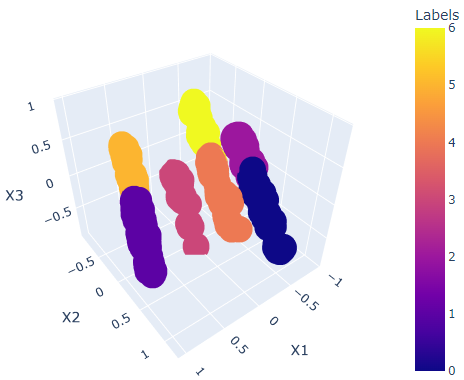

시각적으로 봤을 때 군집이 잘 이루어진 것으로 보임

In [ ]:
results_df = data.drop(['ID'], axis=1)
results_df['Labels'] = kmeans_6.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              1917 non-null   int32
 1   Marital status   1917 non-null   int32
 2   Age              1917 non-null   int64
 3   Education        1917 non-null   int32
 4   Income           1917 non-null   int64
 5   Occupation       1917 non-null   int32
 6   Settlement size  1917 non-null   int32
 7   Labels           1917 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 154.4 KB


# 6. 각 Cluster의 특성 정리

In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

- Cluster 0

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,308.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Marital status,308.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
Age,308.0,37.568182,10.682197,21.0,29.00,36.0,42.0,74.0
Education,308.0,0.737013,0.581187,0.0,0.00,1.0,1.0,2.0
Income,308.0,101816.237013,25620.248566,43684.0,81575.25,103494.5,119984.5,175882.0
Occupation,308.0,0.347403,0.476920,0.0,0.00,0.0,1.0,1.0
Settlement size,308.0,0.061688,0.240980,0.0,0.00,0.0,0.0,1.0
Labels,308.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


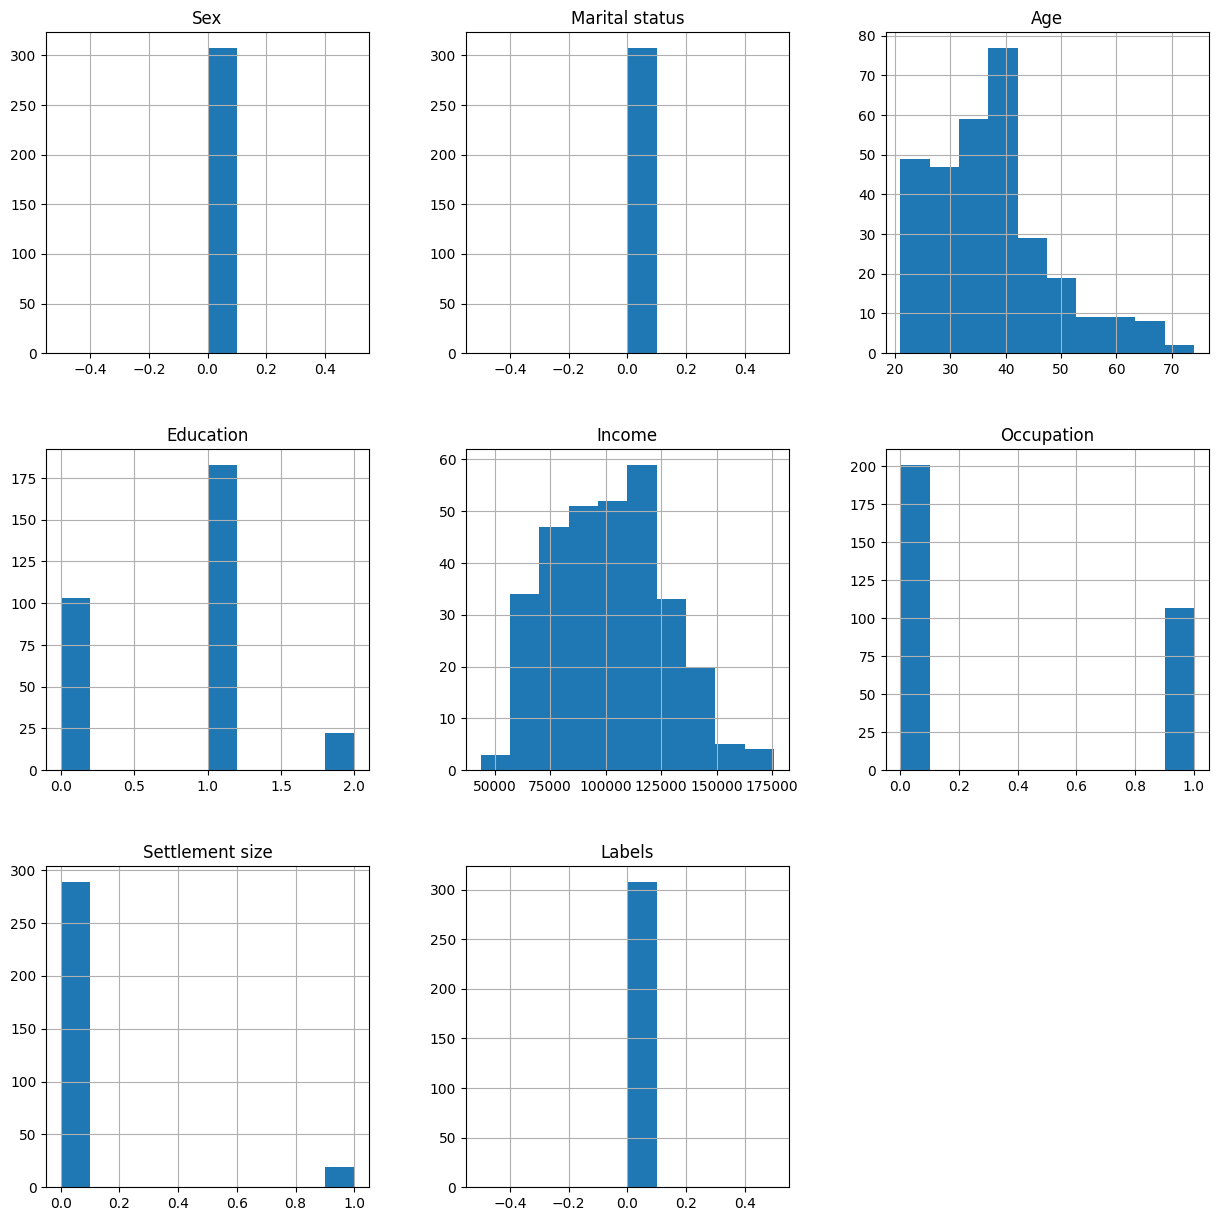

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

Cluster 0의 특성:
1. 남성
2. 미혼
3. 20-40대
4. 고졸 또는 그 이하가 대부분인 교육 수준
5. 중간소득
6. 약 67% 정도 무직
7. 소도시에 거주


- Cluster 1

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,246.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,246.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,246.0,33.593496,10.680394,18.0,26.00,31.0,39.75,67.0
Education,246.0,1.235772,0.479478,1.0,1.00,1.0,1.00,3.0
Income,246.0,118220.146341,31240.908962,62263.0,95699.75,112921.5,140335.00,190413.0
Occupation,246.0,0.886179,0.602081,0.0,1.00,1.0,1.00,2.0
Settlement size,246.0,0.894309,0.826233,0.0,0.00,1.0,2.00,2.0
Labels,246.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


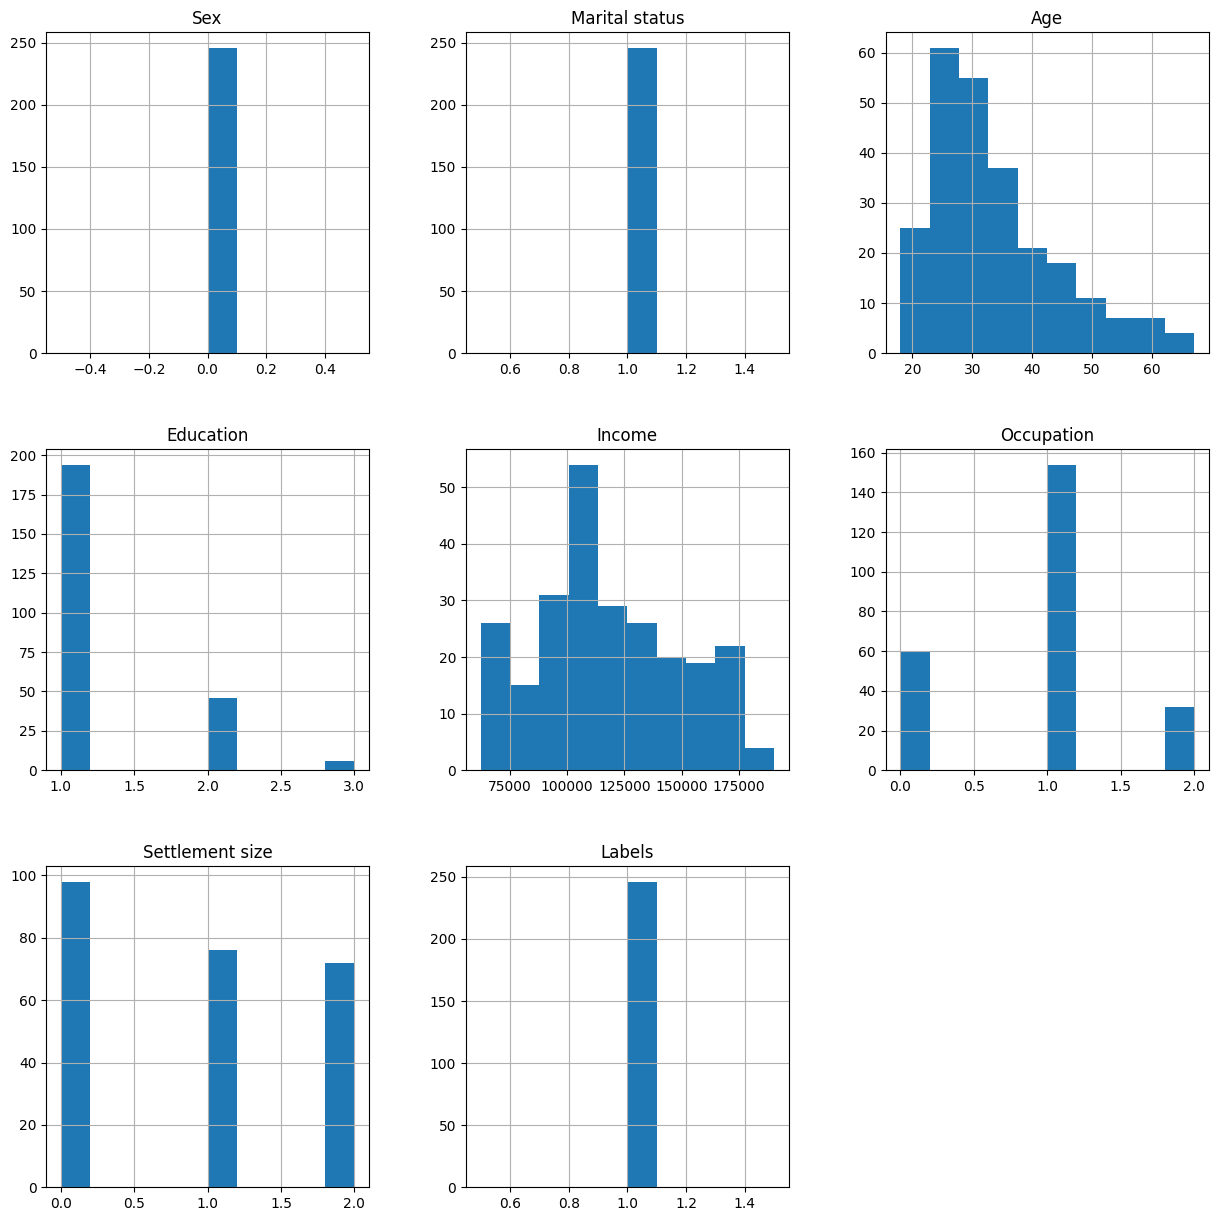

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

Cluster 1의 특성:
1. 남성
2. 기혼
3. 주로 20~30대
4. 고졸 대부분과 고학력자(대학교, 대학원) 존재
5. 중간소득
6. 직원/공무원 근무자가 대다수
7. 소도시, 중간, 대도시에 비교적 고루 분포

- Cluster 2

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,471.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,471.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,471.0,39.481953,11.413094,20.0,31.0,37.0,46.0,74.0
Education,471.0,0.804671,0.590762,0.0,0.0,1.0,1.0,2.0
Income,471.0,136037.789809,24749.105731,82398.0,117762.5,133436.0,152870.0,198029.0
Occupation,471.0,1.218684,0.462361,0.0,1.0,1.0,1.0,2.0
Settlement size,471.0,1.513800,0.521170,0.0,1.0,2.0,2.0,2.0
Labels,471.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


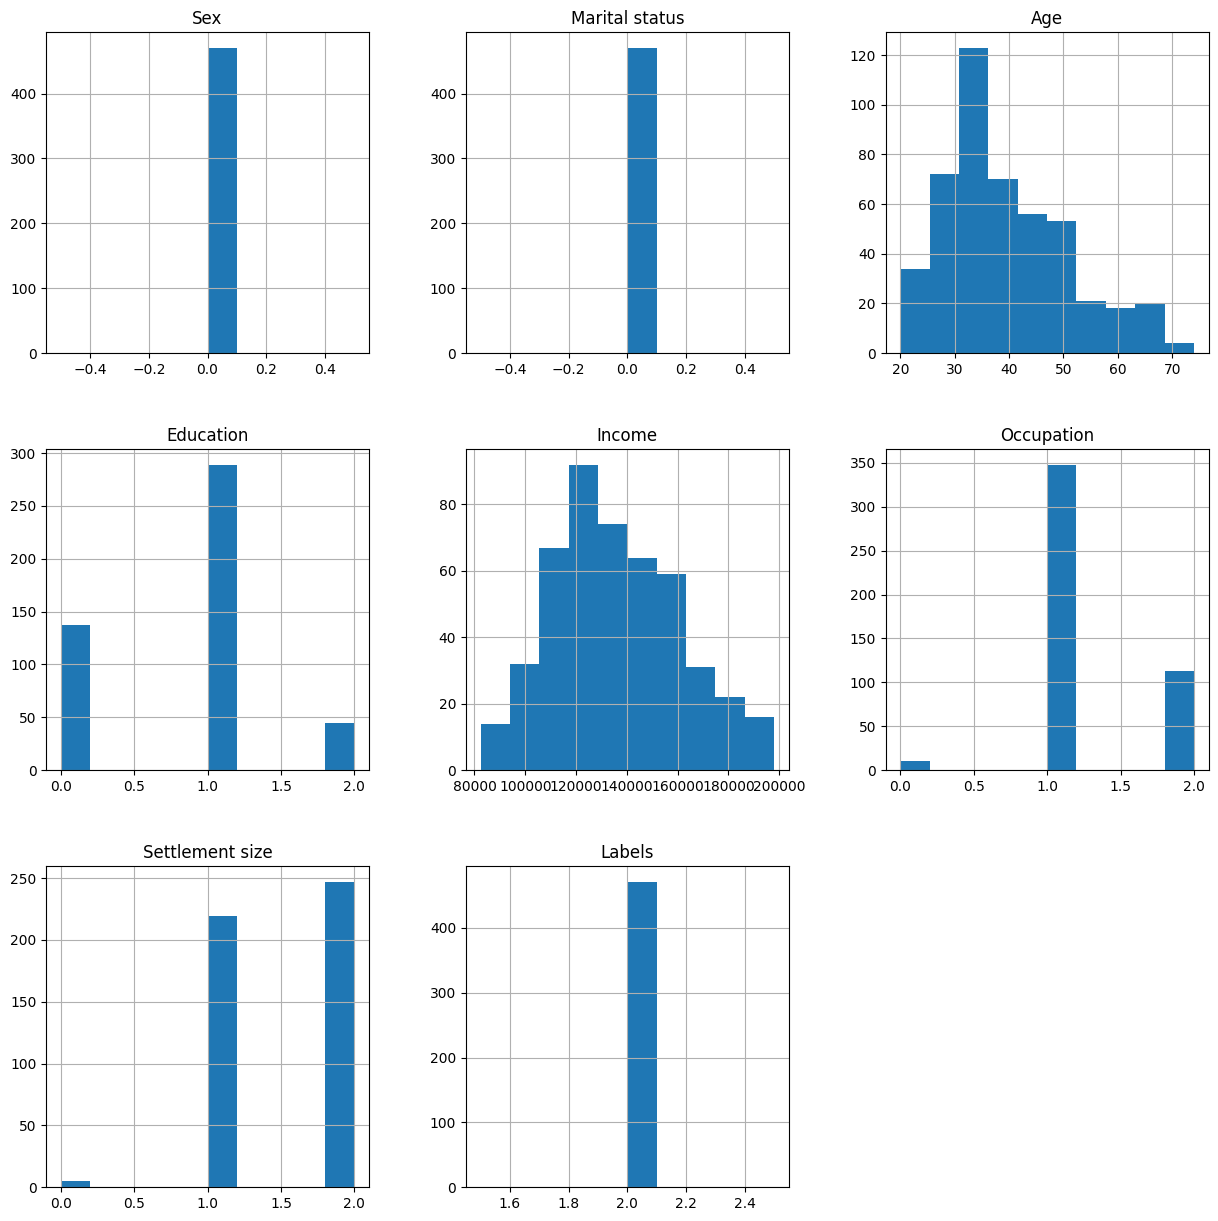

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));
plt.savefig('cluster4_results')

Cluster 2 특성:
1. 남성
2. 미혼
3. 30~40대
4. 대부분 고졸 교육수준
5. 중간소득
6. 직원 / 공무원 근무자
7. 중간 도시와 대도시 거주

- Cluster 3:

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,291.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,291.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,291.0,33.697595,12.609437,18.0,25.0,29.0,37.0,76.0
Education,291.0,1.302405,0.548944,1.0,1.0,1.0,2.0,3.0
Income,291.0,130182.835052,26932.267809,88800.0,107696.5,125168.0,149410.5,194882.0
Occupation,291.0,1.127148,0.381899,0.0,1.0,1.0,1.0,2.0
Settlement size,291.0,1.329897,0.506271,0.0,1.0,1.0,2.0,2.0
Labels,291.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


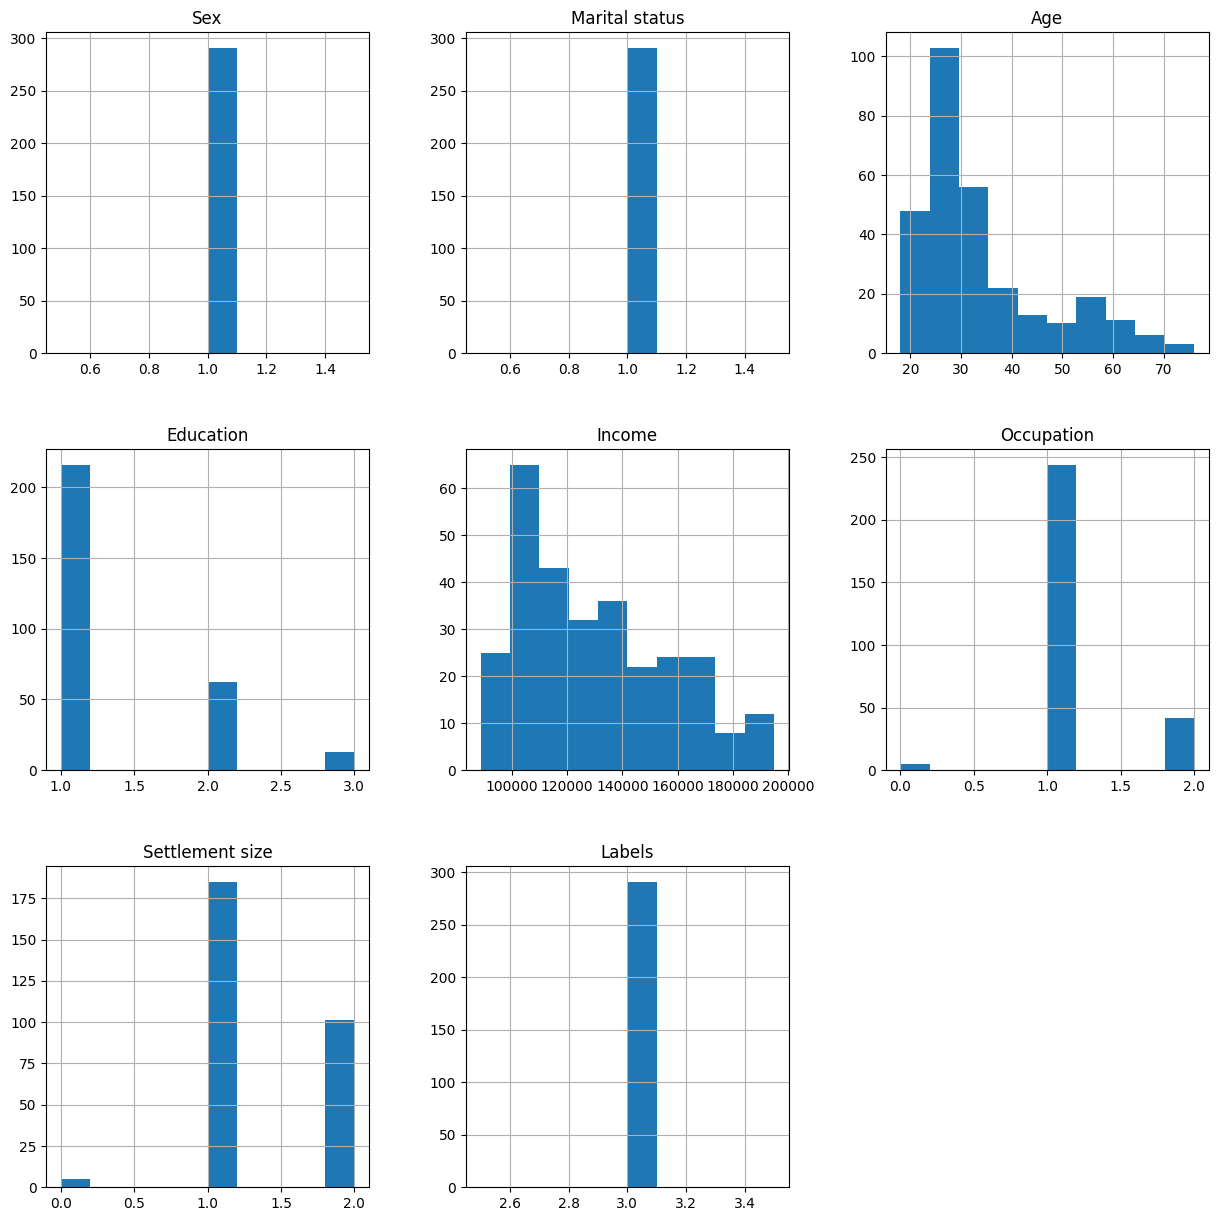

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

Cluster 3의 특성:
1. 여성
2. 기혼
3. 20~30대
4. 고졸이 대부분, 고학력자(대학교, 대학원)존재
5. 중간소득
6. 직원/공무원
7. 중간도시, 대도시 거주

- Cluster 4

In [ ]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,177.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,177.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,177.0,35.152542,9.783126,19.0,27.0,35.0,41.0,70.0
Education,177.0,0.932203,0.559964,0.0,1.0,1.0,1.0,3.0
Income,177.0,98343.214689,21265.648831,45590.0,81014.0,101948.0,113290.0,143321.0
Occupation,177.0,0.372881,0.507835,0.0,0.0,0.0,1.0,2.0
Settlement size,177.0,0.073446,0.261608,0.0,0.0,0.0,0.0,1.0
Labels,177.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


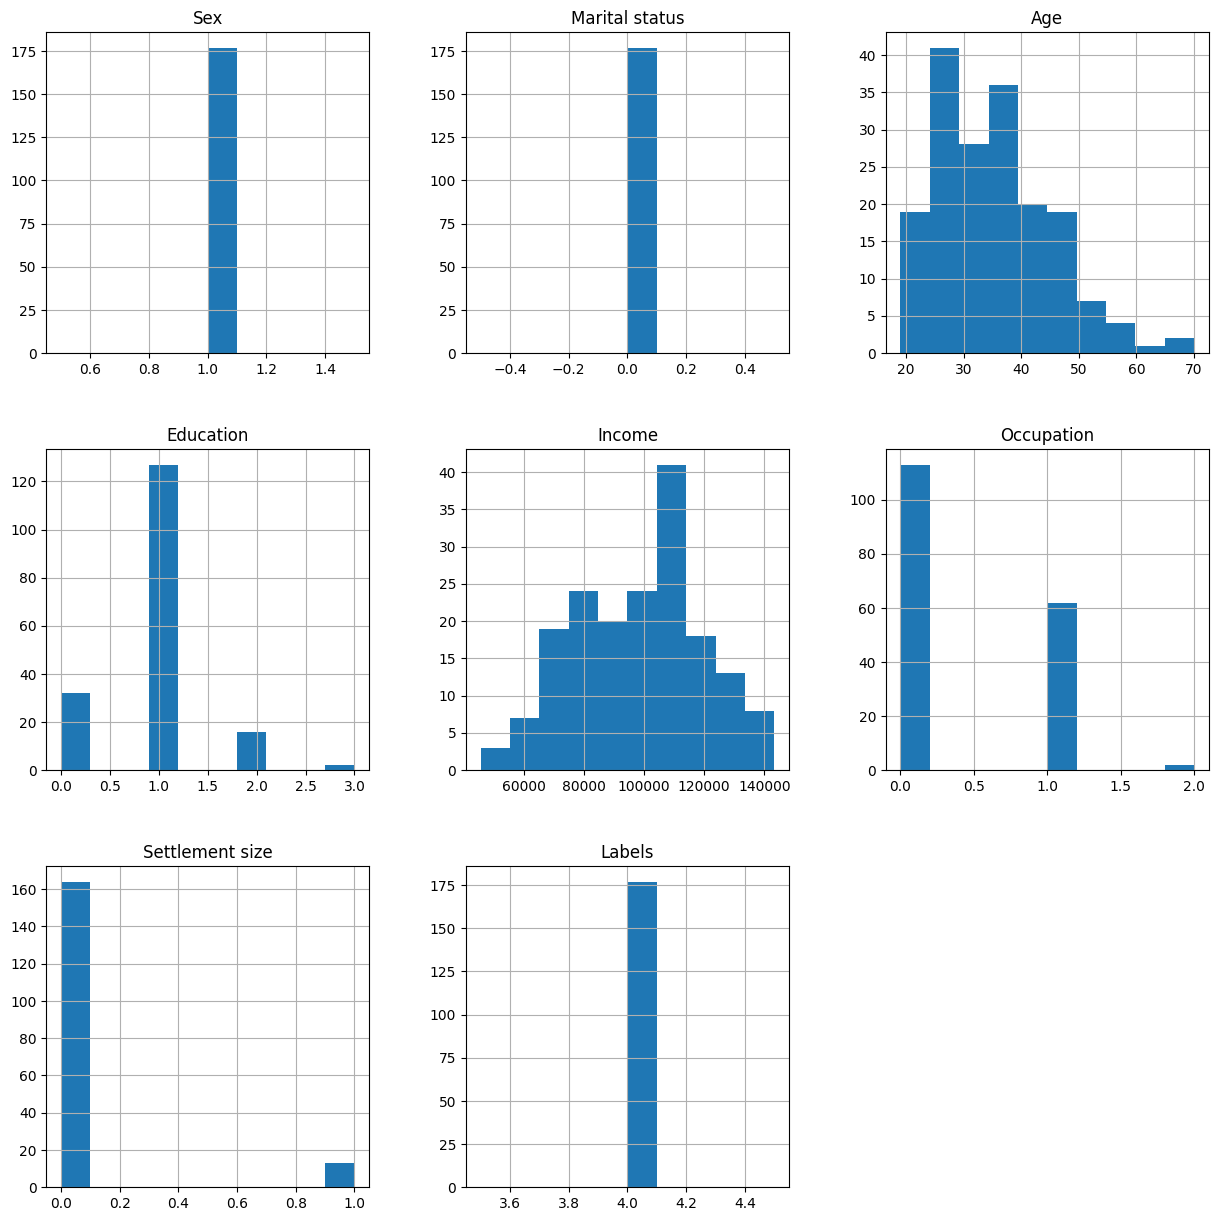

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

Cluster 4의 특성:
1. 여성
2. 미혼
3. 20~40대
4. 대부분 고졸 교육수준
5. 저소득
6. 대부분 무직
7. 소도시 거주

- Cluster 5

In [ ]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,424.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Marital status,424.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
Age,424.0,32.318396,10.782836,18.0,25.00,28.0,36.0,71.0
Education,424.0,1.209906,0.467169,1.0,1.00,1.0,1.0,3.0
Income,424.0,101487.990566,24496.809592,38247.0,86242.75,102009.0,120213.5,190518.0
Occupation,424.0,0.429245,0.495553,0.0,0.00,0.0,1.0,1.0
Settlement size,424.0,0.004717,0.068599,0.0,0.00,0.0,0.0,1.0
Labels,424.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0


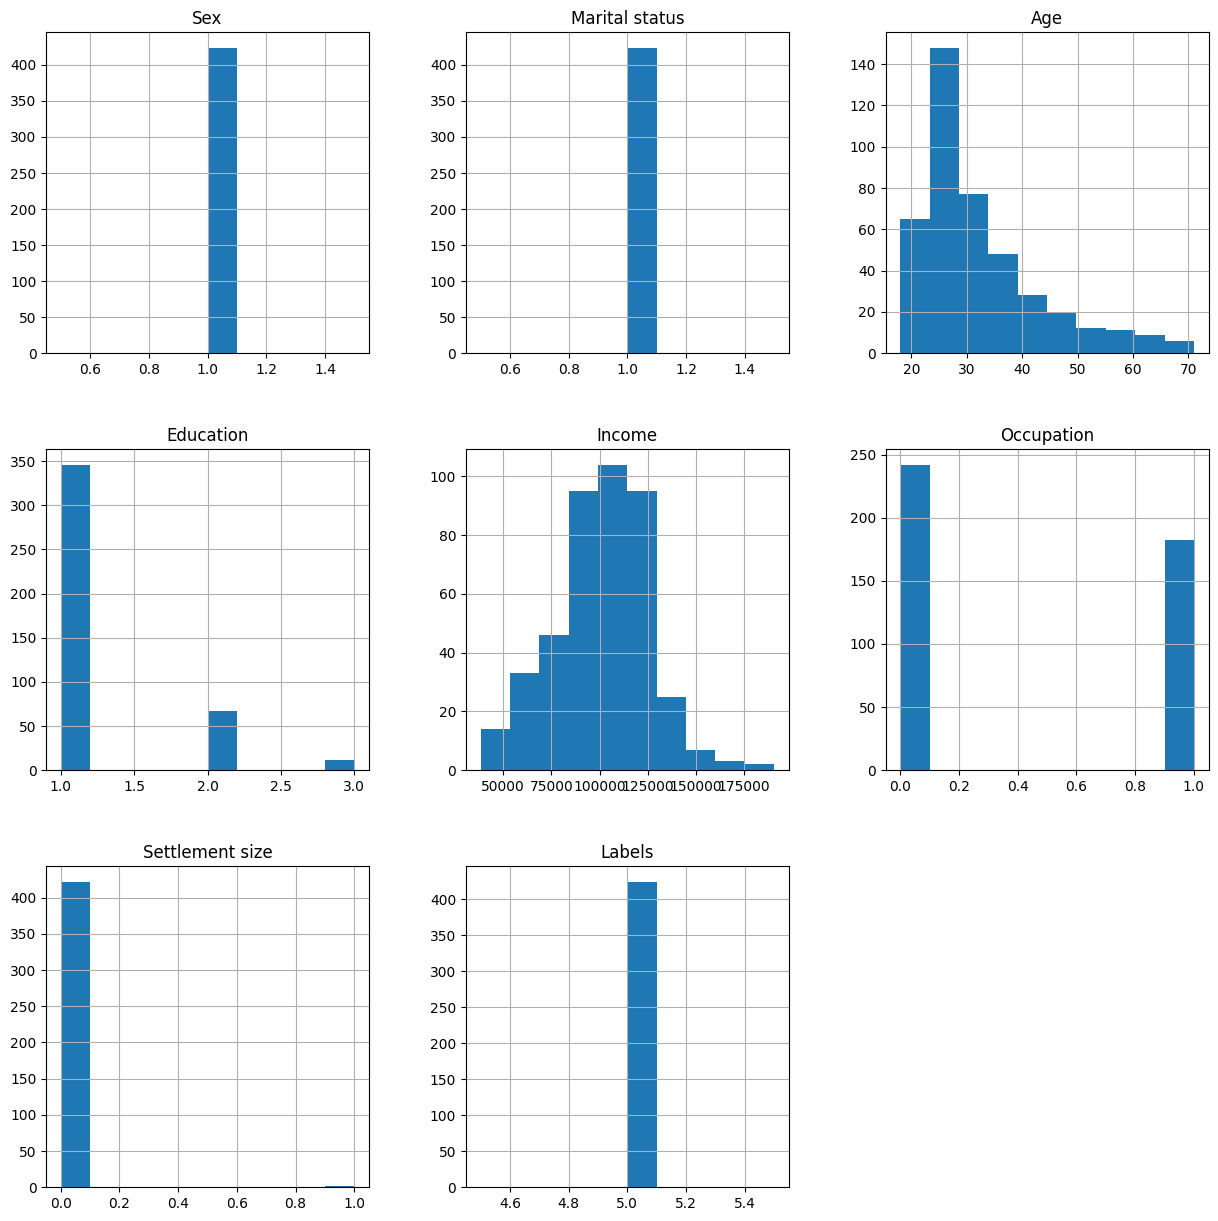

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

Cluster 5의 특성:
1. 여성
2. 기혼
3. 20~30대
4. 대부분 고졸 교육수준
5. 저소득
6. 무직과 직장/공무원 근로자가 거의 균일하게 존재
7. 소도시 거주

- 각 Cluster의 Centroids

In [ ]:
centroids = kmeans_6.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = results_df.columns[:8], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
centroid_df.drop(columns='Labels', inplace=True)
centroid_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,0.510590,-4.996004e-16,9.992007e-16,0.337382,0.245671,0.397850,0.173701
C1,0.439935,0.000000e+00,1.000000e+00,0.268853,0.411924,0.500514,0.443089
C2,0.349749,-2.609024e-15,1.443290e-15,0.370379,0.268224,0.612026,0.609342
C3,0.413131,1.000000e+00,1.000000e+00,0.270648,0.434135,0.575383,0.563574
C4,0.821300,1.000000e+00,1.110223e-15,0.295733,0.310734,0.376114,0.186441
C5,0.655515,1.000000e+00,1.000000e+00,0.246869,0.403302,0.395795,0.214623


# 7. Classification(지도학습) - DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split

In [ ]:
X = results_df.drop(columns={'Labels'}, axis=1)
y = results_df['Labels']

# X와 y 집합을 학습용과 테스트용으로 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# DecisionTree 모델 생성
# max_depth는 가지를 치는 횟수, min_smaples_leaf = 5는 분류를 했을 때 sample수가 5면 더 이상 가지를 치지 않는다.
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5, random_state=42)

In [ ]:
# 모델 학습
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [ ]:
# X의 test data를 이용해 예측
predictions = clf.predict(X_test)

## 7.1. DecisionTree 후 Accuracy 측정

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 예측한 값과 y의 test data와 비교한 confusion matrix 출력 & Accuracy 확인
# Accuracy = 0.98 -> 98% 예측 성공
print(confusion_matrix(y_test, predictions), '\n')
print(classification_report(y_test, predictions))
acc = (predictions == y_test).sum() / len(y_test)

print(f'정확도: {100*acc:.2f}%')

[[59  0  0  0  0  0]
 [ 0 45  0  0  0  0]
 [ 3  0 97  0  0  0]
 [ 0  0  0 59  0  3]
 [ 0  0  0  0 33  0]
 [ 0  0  0  0  0 85]] 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      1.00      1.00        45
           2       1.00      0.97      0.98       100
           3       1.00      0.95      0.98        62
           4       1.00      1.00      1.00        33
           5       0.97      1.00      0.98        85

    accuracy                           0.98       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.98      0.98       384

정확도: 98.44%


DecisionTree로 분류를 진행한 결과 **accuracy=0.98**로 군집 결과와 비교가 가능하다.
이 DecisionTree를 사용해 분류한 이유는 클러스터링의 군집수를 정의하는 데 도움이 되고, 결과에서 해석해야 하는 각 군집의 특성에 대한 큰 틀을 주기 때문에 수행을 하였다.

## 7.2. DecisionTree 시각화

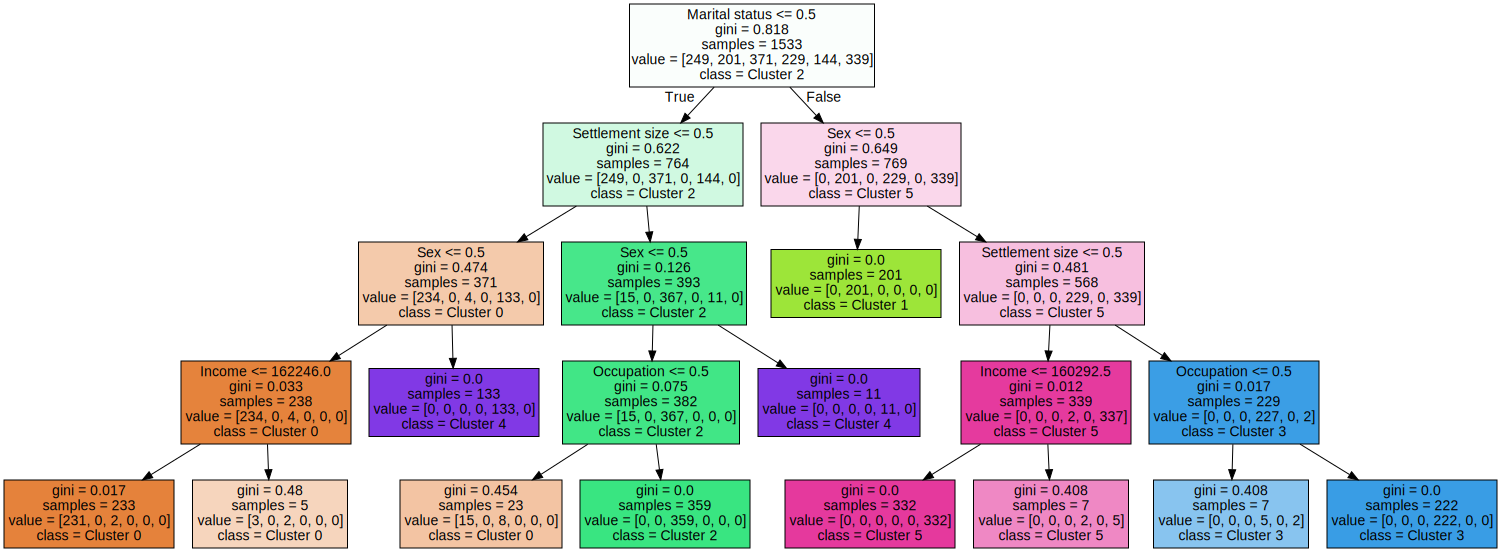

<Figure size 640x480 with 0 Axes>

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=results_df.columns[:7],
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")

plt.savefig('DecisionTree.png')
graph

# DecisionTree 결과

결론: 각 Cluster의 대표 특성 요약

- 1. Cluster 0 : 싱글 + 남성 + 소도시 + 미취업자/취업자(employee/self-employed)
- 2. Cluster 1 : 비 싱글 + 남성
- 3. Cluster 2 : 싱글 + 남성 + 중/대도시 + 취업자(employee/self-employed)
- 4. Cluster 3 : 비 싱글 + 여성 + 중/대도시 + 취업자(management/self-employed)
- 5. Cluster 4 : 싱글 + 여성 + 소도시
- 6. Cluster 5 : 비 싱글 + 여성 + 소도시